# 1] Data Cleaning and preparation 
-- load the dataset into Dataframe or equivalent data Structure.

-- Handle missing values appropriatly(e.g,imputation deletion)

-- identify and correct any value  inconsistence in data types (e.g numerical values stored as strings)

--  Dete and treate outelier neseccery

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt   #Import Liabraries
import seaborn as sns

In [2]:
df=pd.read_csv("Cardiotocographic.csv")
df # index_col=0

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
missing_values=df.isnull().sum()
missing_values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [4]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
df_imputed= df.fillna(df.mean())

In [6]:
missing_values_after_imputation = df_imputed.isnull().sum()
missing_values_after_imputation

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [7]:
# identify numerical columns
import numpy as np
numerical_columns = df.columns[:-1] # Excluted last column NSD

In [8]:
numerical_columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency'],
      dtype='object')

In [9]:
def detect_outliers_iqr(df, column):    # detect outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [10]:
outliers_dict ={column : detect_outliers_iqr(df,column)for column in numerical_columns}

In [11]:
outliers_count={column : len(outliers)for column,outliers in outliers_dict.items()}
print(outliers_count)

{'LB': 10, 'AC': 40, 'FM': 347, 'UC': 13, 'DL': 125, 'DS': 120, 'DP': 284, 'ASTV': 10, 'MSTV': 80, 'ALTV': 318, 'MLTV': 81, 'Width': 10, 'Tendency': 10}


In [12]:
def remove_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column]>= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

df_cleaned = df.copy()
for column in  numerical_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned,column)
    
    df_cleaned
    # data_cleaned.head()

In [13]:
df_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.000000,0.0,1.000000
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.000000,0.0,1.000000
7,122.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,83.0,0.5,6.000000,15.6,69.920261,1.0,3.000000
9,122.0,0.000000,0.000000,0.002967,0.000000,0.0,0.0,86.0,0.3,6.000000,10.6,68.000000,1.0,3.000000
26,124.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,86.0,0.4,14.000000,4.8,24.000000,-1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.000000,0.0,1.000000
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.000000,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.000000,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.000000,1.0,2.000000


 # 2. Statistical summery
 ●Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●Highlight any interesting findings from this summary.

In [14]:
# df.describe()  # showing a statistical summary.

summary = df_imputed.describe()
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


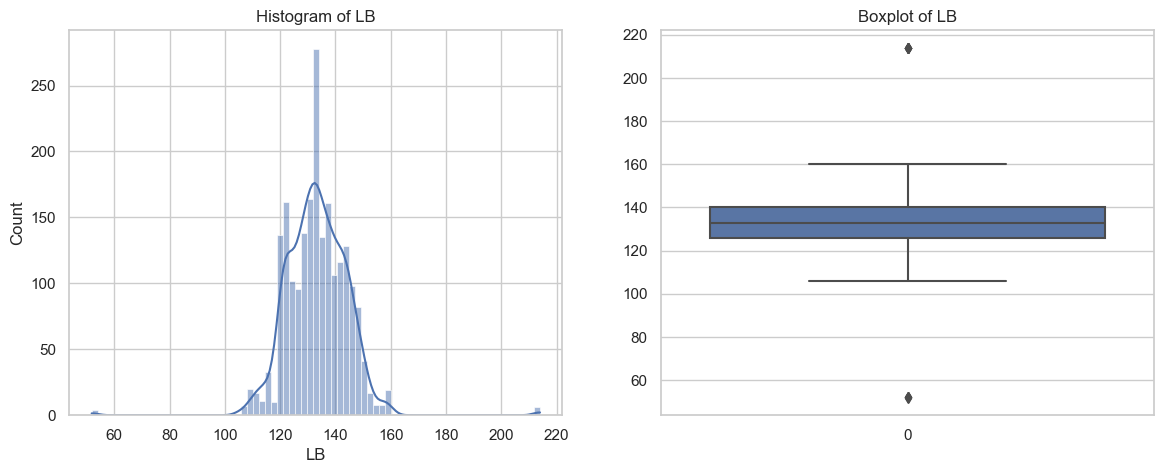

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


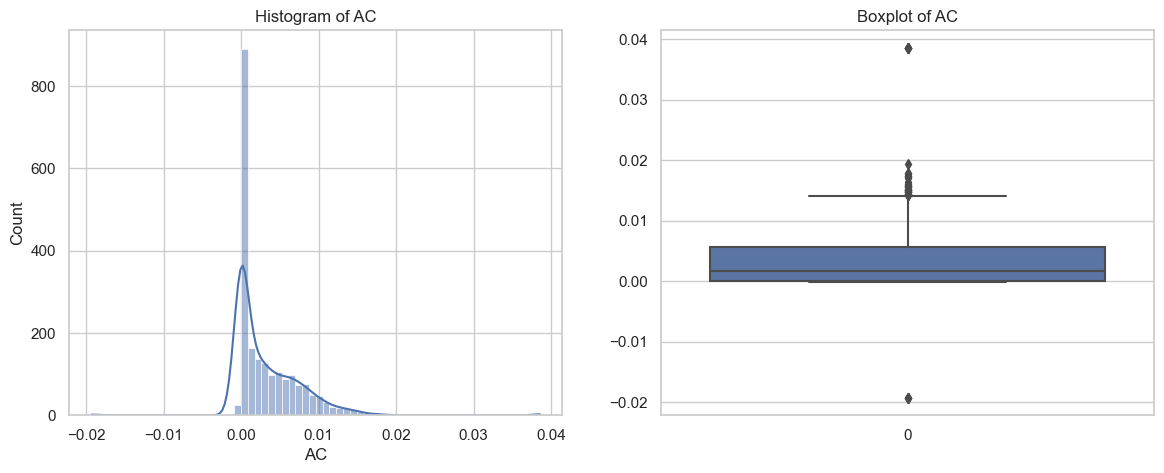

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


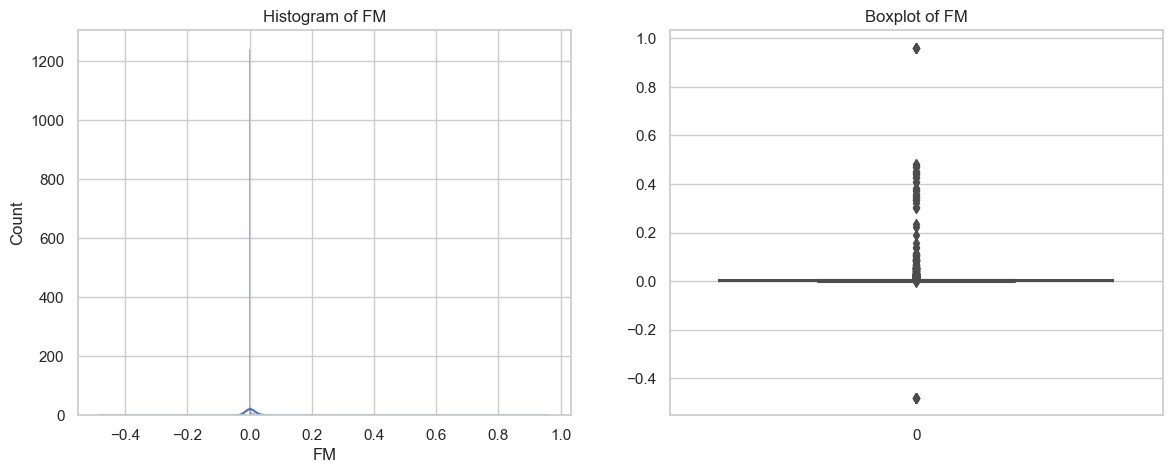

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


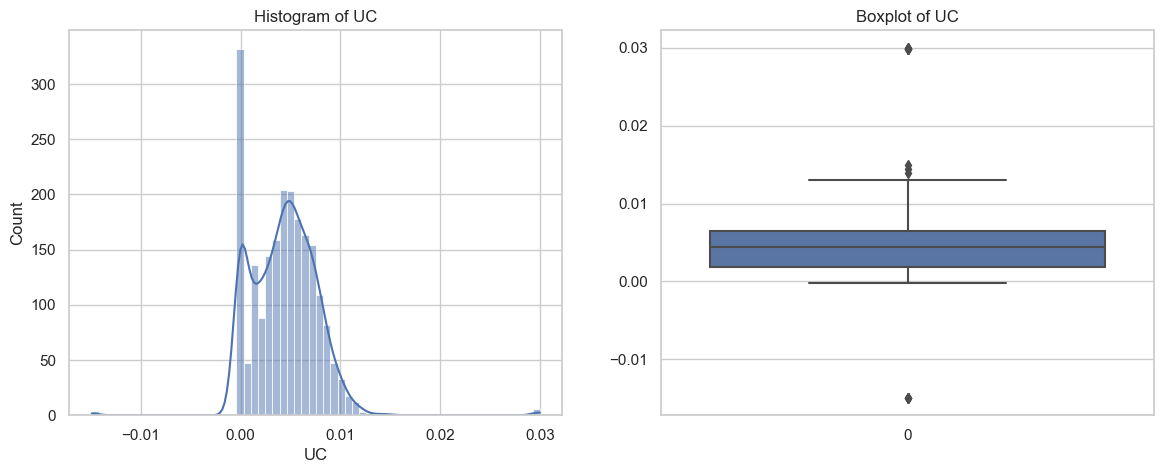

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


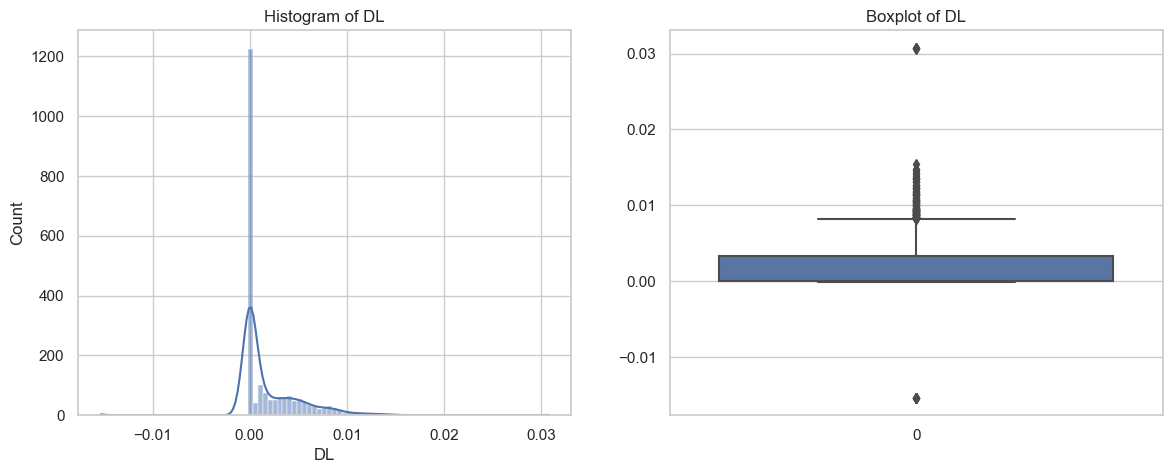

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


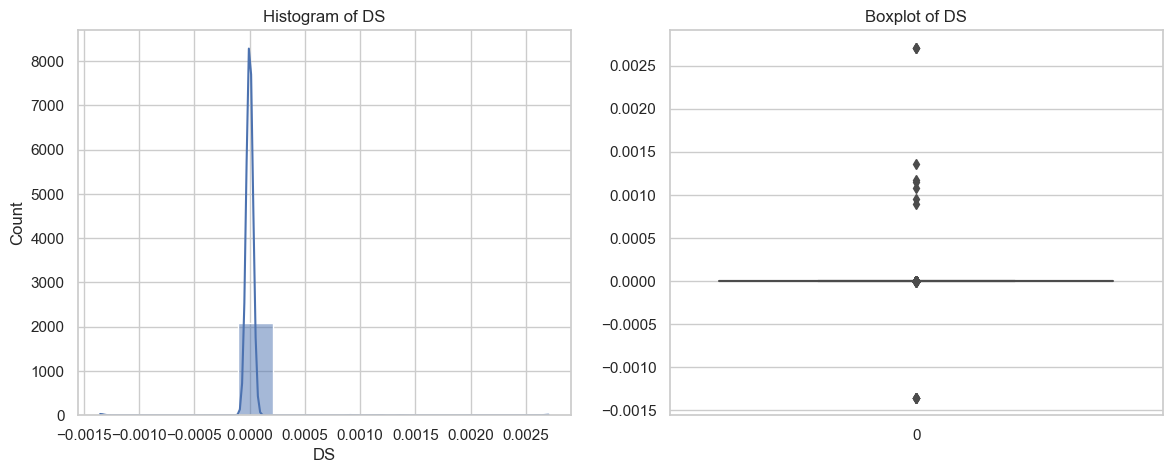

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


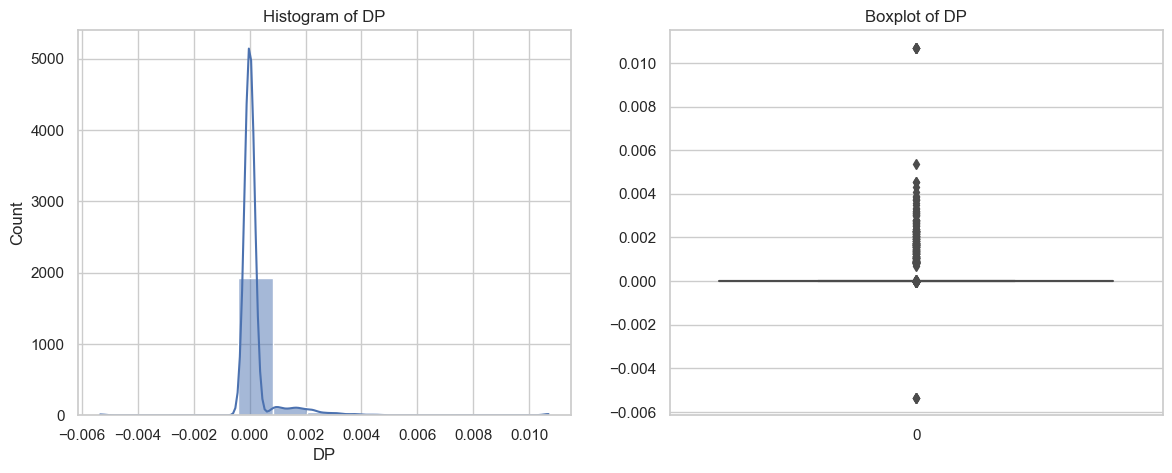

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


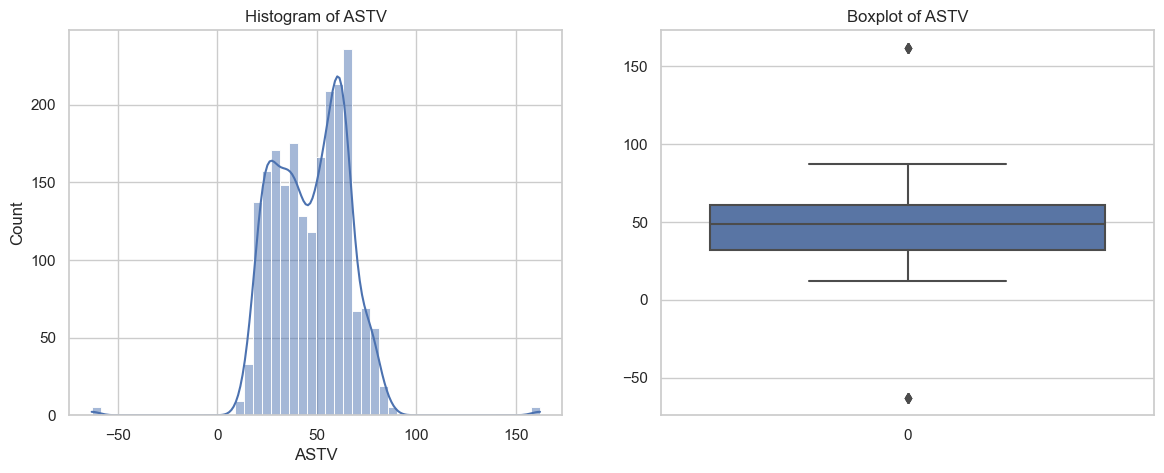

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


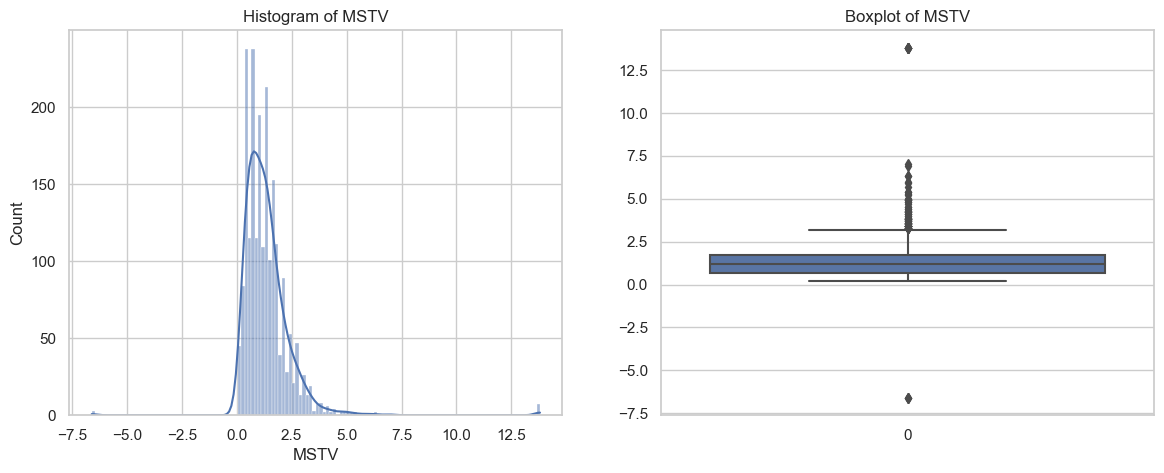

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


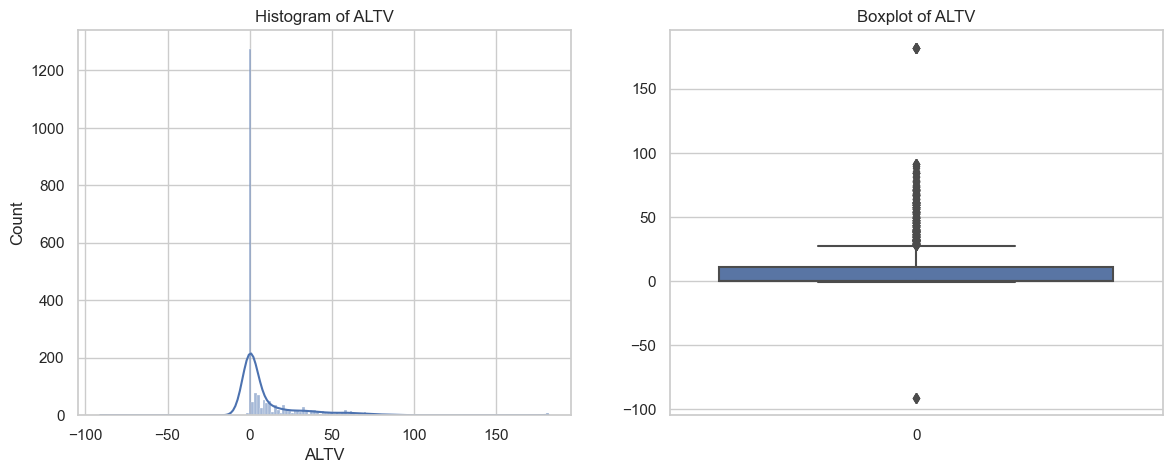

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


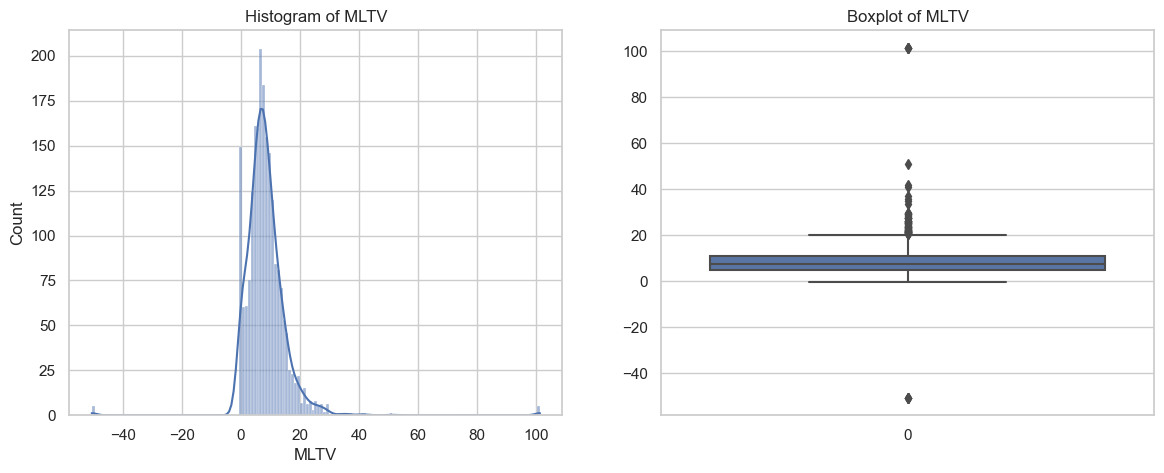

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


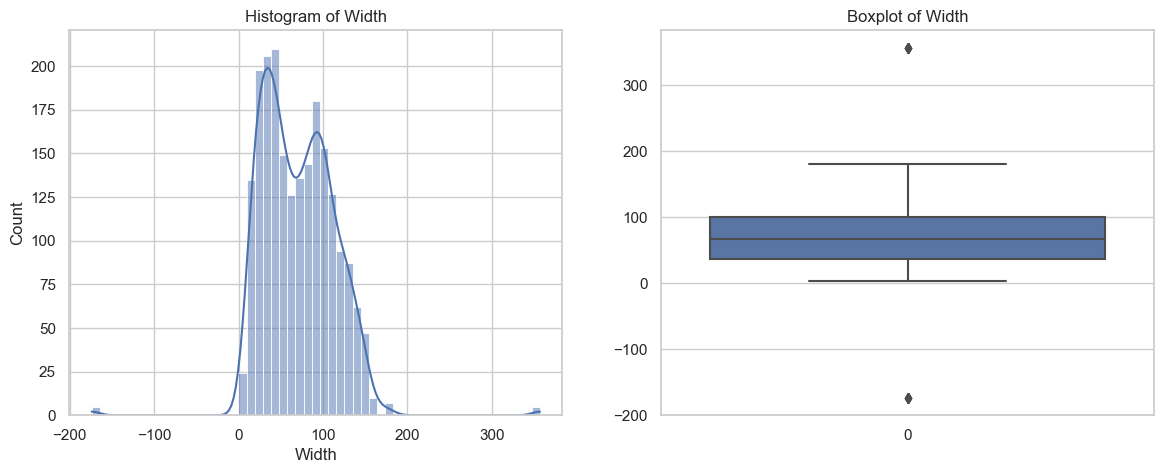

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


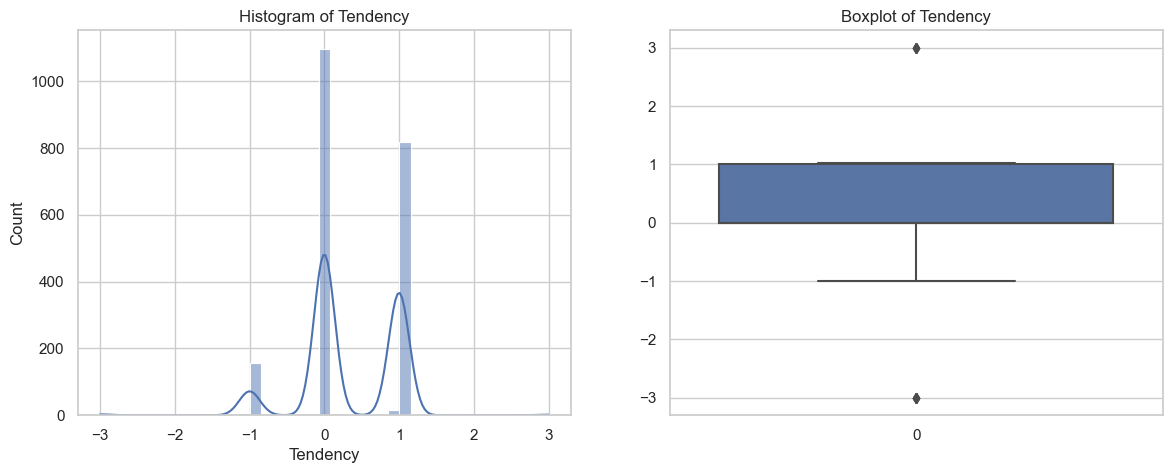

In [29]:
import matplotlib.pyplot as plt   #Import Liabraries
import seaborn as sns

sns.set(style = "whitegrid")    # style for the plots, Seaborn has five built-in themes to style its plots: darkgrid , whitegrid , dark , white , and ticks.

def create_hist_boxplot(df, column):    # Define a function to create histograms and boxplots
    fig, ax = plt.subplots(1, 2, figsize = (14, 5))

    sns.histplot(df[column], kde=True, ax = ax[0])  #Histogram
    ax[0].set_title(f'Histogram of {column}')

    sns.boxplot(df[column], ax = ax[1])    #Boxplot
    ax[1].set_title(f'Boxplot of {column}')

    plt.show()

numerical_columns = df.columns[: -1]  # histograms and boxplots for numerical variables, left the last column NSP
for column in numerical_columns:
    create_hist_boxplot(df, column)

In [30]:
def create_bar_chart(df, column):
    plt.figure(figsize = (10,6))
    sns.countplot(df[column])
    plt.title (f'Frequency of {column}')
    plt.show()
    
    create_bar_chart(df,'NSP')

In [31]:
def create_scatter_and_heatmap(df):
    
    sns.pairplot(df)
    plt.title('Pair plot')
    plt.show()
    
    plt.figure(figsize=(15 , 10))
    corr = df.corr()
    sns.heatmap(corr, annot = true, cmap='coolwarm',fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
    create_scatter_and_heatmap(df)

In [32]:
def create_violin_plots(df):
    plt.figure(figsize=(14 , 8))
    sns.violinplot(df=df)
    plt.title('Violin plots of all Variables')
    plt.show()
    create_violin_plots(df)

# 4. Pattern Recognition and Insights:
●Identify any correlations between variables and discuss their potential implications.

●Look for trends or patterns over time if temporal data is available.

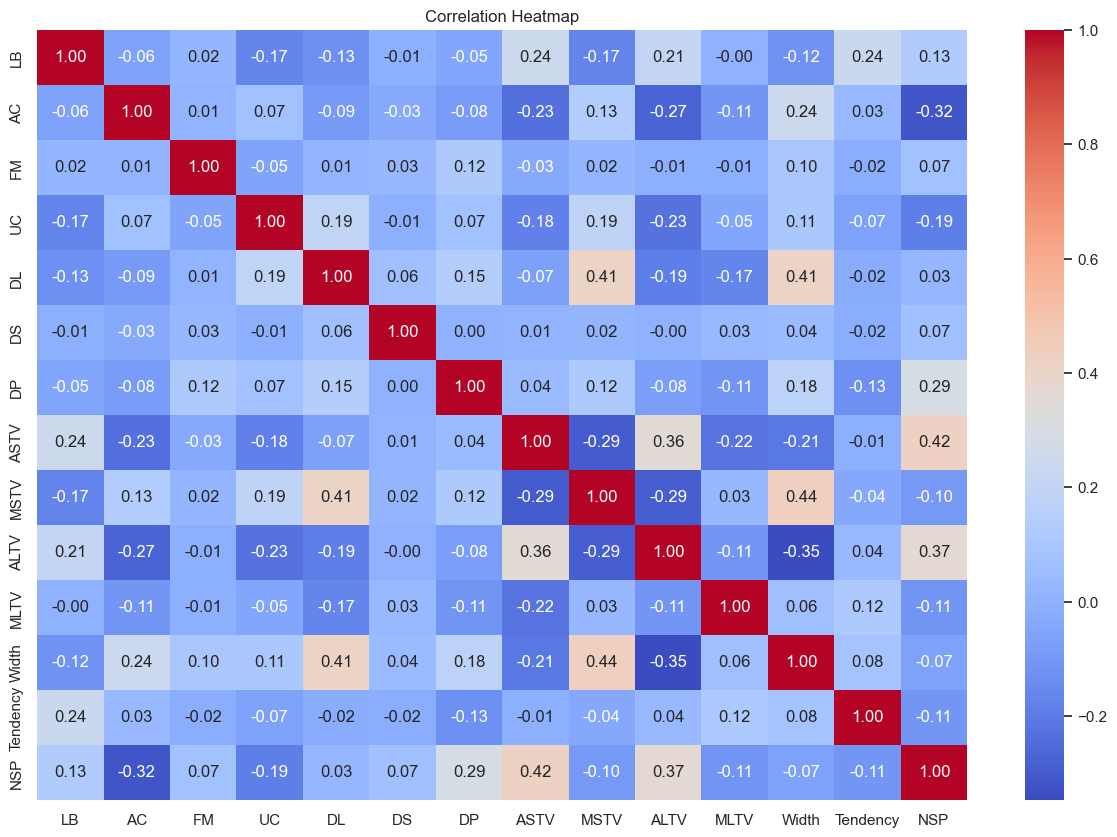

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,annot= True, cmap = 'coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
time_column = 'Time'  # Placeholder, replace with actual column name if available

# Check if the time column exists in the dataset
if time_column in df.columns:
    # Convert the time column to datetime format if necessary
    df[time_column] = pd.to_datetime(df[time_column])

    # Create line plots for each numerical variable over time
    numerical_columns = df.columns[:-1]  # Excluded the last column NSP
    for column in numerical_columns:
        if column != time_column:
            plt.figure(figsize=(10, 6))
            sns.lineplot(x=df[time_column], y=df[column])
            plt.title(f'{column} Over Time')
            plt.xlabel('Time')
            plt.ylabel(column)
            plt.show()
else:
    print("No time-related column found in the dataset.")
     

No time-related column found in the dataset.


# 5.Conclusion:
●Summarize the key insights and patterns discovered through your exploratory analysis.

●Discuss how these findings could impact decision-making or further analyses.

Key Insights and Patterns :

Correlation Analysis :

The correlation heatmap would reveal the strength and direction of relationships between variables. Variables with strong positive or negative correlations suggest a direct relationship.

Distribution of Variables:

Histograms and boxplots show the distribution and spread of each variable. Variables like FM, DL, ALTV, DS, and DP have a median of 0, indicating many samples have zero values for these measurements. The high variability in ALTV indicates significant differences among samples.

Outliers:

Boxplots help identify outliers which could be important data points or potential errors. Addressing outliers appropriately can improve the robustness of any models built on this data.

Implications for Decision-Making :

Healthcare and Clinical Decisions:

Understanding the relationships between different cardiotocographic measurements can help healthcare professionals monitor fetal health more effectively. Identifying critical variables that significantly impact fetal outcomes can prioritize monitoring and intervention efforts.

Predictive Modeling:

Strongly correlated variables can be used as predictors in models aimed at forecasting fetal health outcomes.